<a href="https://colab.research.google.com/github/hackveda-canada/Data-Science-Essentials/blob/master/Data_Science_Essentials_Day_24_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


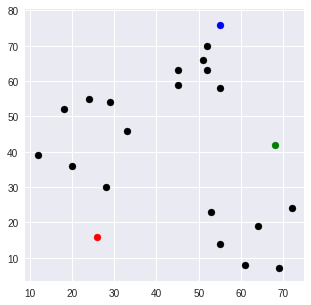

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

# random.seed --> it will produce the same data
np.random.seed(200)

k = 3

# centroids = [x,y]

centroids = {i+1 :[np.random.randint(0,80), 
                  np.random.randint(0,80)]
            for i in range(k)}
print (centroids)

# Plot a graph

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'],color='k') # k --> Black
colmap = {1:'r', 2:'g',3:'b'}
for i in centroids.keys():
    #print (i)
    #print (*centroids[i])
    plt.scatter(*centroids[i],color=colmap[i])
    
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


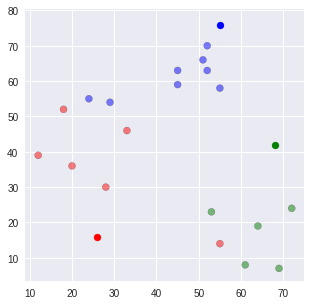

In [2]:
def assignment(df , centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
        np.sqrt((df['x'] - centroids[i][0])**2 + (df['y']-centroids[i][1]) ** 2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df,centroids)
print (df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.show()

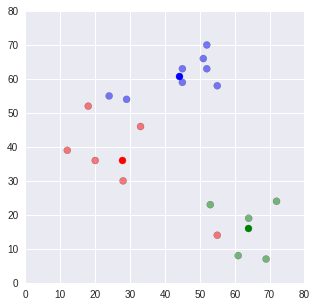

In [3]:
## Update

import copy

old_centroids = copy.deepcopy(centroids)
#print (old_centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'] ,df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

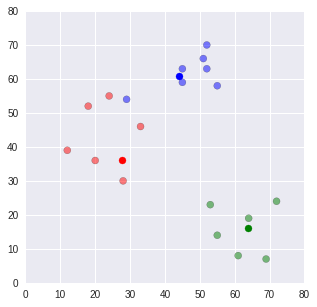

In [4]:
df = assignment(df,centroids)

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

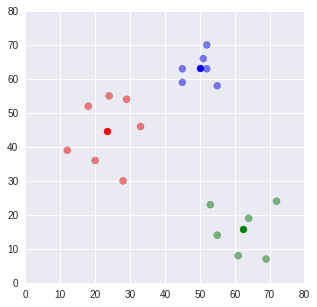

In [5]:
# Continue all assigned categories don't change any more

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'] ,df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show() 

In [6]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

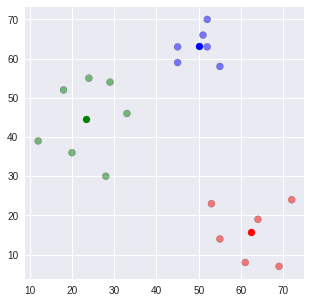

In [8]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1],labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'],color=colors1,alpha=0.5,edgecolor='k')
for idx , centroids in enumerate(centroids):
    plt.scatter(*centroids,color=colmap[idx+1])  
plt.show()

In [16]:
#User defined function for KMean algorithm

def assignment(df,centroids):
  #euclidean function
  for i in centroids.keys():
    #adding new column for distance from centroids
    df['distance_from_{}'.format(i)] = (np.sqrt((df['x']-centroids[i][0]) **2 + (df['y']-centroids[i][1]) **2))
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  #new column for minimum distance location
  df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df


df = assignment(df,centroids)
print (df.head)

<bound method NDFrame.head of      x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  36        20.880613        48.373546        53.150729        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        53.712196        26.400758  